In [ ]:
# import libraries


In [ ]:
# Download latest version
path = kagglehub.dataset_download("tmdb/tmdb-movie-metadata")
print("Path to dataset files:", path)

# Read file into df1 and df2
df1 = pd.read_csv(str(path +'/tmdb_5000_credits.csv'))
df2 = pd.read_csv(str(path + '/tmdb_5000_movies.csv'))

# Preprocessing the data before merged
df1 = df1.drop('??', axis=1)
df1.columns = ['id', 'cast', 'crew']

# Create new DataFrame called data, merged from df1 and
data = df2.merge(df1, on='id')

Using Colab cache for faster access to the 'tmdb-movie-metadata' dataset.
Path to dataset files: /kaggle/input/tmdb-movie-metadata


--- Simplified Data Processed Result (Only Main_Genre) ---
                                      title Main_Genre
0                                    Avatar     Action
1  Pirates of the Caribbean: At World's End  Adventure
2                                   Spectre     Action
3                     The Dark Knight Rises     Action
4                               John Carter     Action


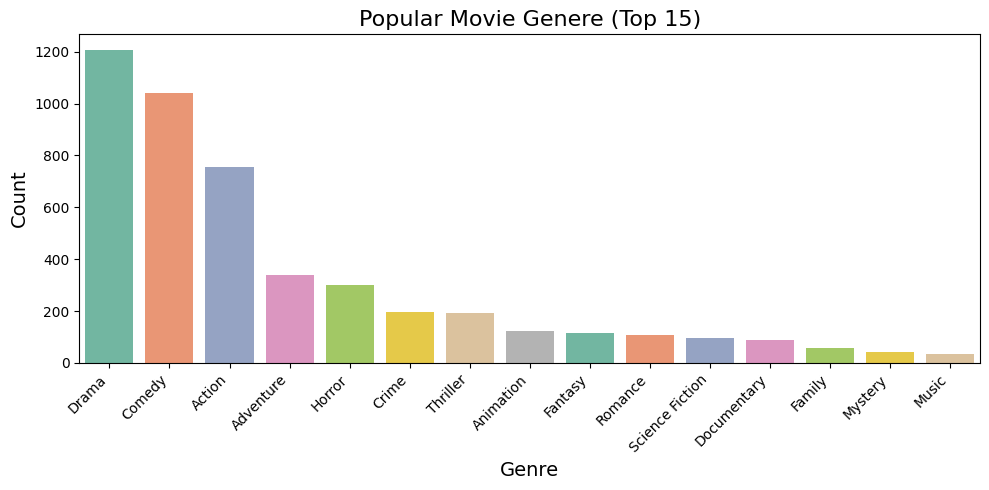


--- Most Popular Movie Genere (Top 5) ---
       Genre  Movie_Count
0      Drama         1207
1     Comedy         1042
2     Action          754
3  Adventure          339
4     Horror          300


In [ ]:
# Plotting Simplified Descriptive Statistics
# Step 1: simplify data, only saved first genres

# purpose: find the first genre in column 'genres', suitable for lecturing.
def get_main_genre(genres_str):

    if pd.isna(genres_str) or genres_str == '[]':
        return 'Unknown'

    try:
        # find the location after the first 'name: '
        start_index = genres_str.find('"name": "') + 9 # "names": "，total ?? characters
        # find the first '"' after start_index
        end_index = genres_str.find('"', start_index)

        # check the name retrieved are correct
        if start_index != ?? and end_index > start_index: # when str.find == -1?
            return genres_str[start_index:end_index]
        else:
            return 'Unknown'
    except:
        return 'Unknown'


# new a column 'Main_genre' by applying get_main_genre into data['genres']
data['Main_Genre'] = data['genres'].apply(get_main_genre)

print("--- Simplified Data Processed Result (Only Main_Genre) ---")
print(data[['title', 'Main_Genre']].head())

# --- Step 2: Count Sum of each Genre ---

# 統計每個「主要類型」出現的次數
genre_counts = data['Main_Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Movie_Count']

# Select the Top 15 Count Sum of Movie Genre
top_genres = genre_counts.head(15)

# --- Step 3: Visualization with Histogram ---

plt.figure(figsize=(10, 5))
# Plotting Histogram
sns.barplot(x='Genre', y='Movie_Count', hue = 'Genre', data=top_genres, palette='Set2', legend=False)

# Details setting of Histogram
plt.title('Popular Movie Genere (Top 15)', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right') # Rotate label to prevent overlapping
plt.tight_layout()
plt.show()


print("\n--- Most Popular Movie Genere (Top 5) ---")
print(genre_counts.head(5))

--- Average Revenue of the First 5 month (Jan - May) ---
  Release_Month  Average_Revenue  Average_Revenue_Million
4       January     5.469106e+07                54.691061
3      February     7.721994e+07                77.219935
7         March     1.105462e+08               110.546235
0         April     1.110501e+08               111.050073
8           May     1.877090e+08               187.709028


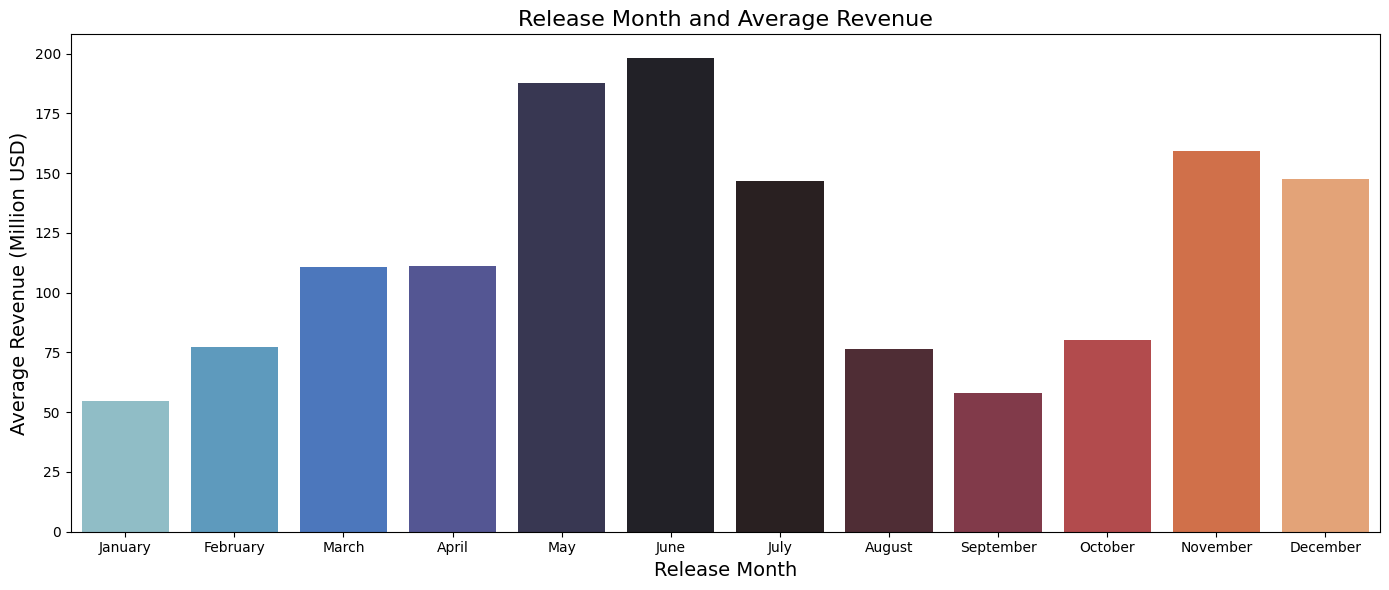

In [ ]:
# show the revenue based on month

# --- Step 1: data cleasing and month data retrieve ---
# 1. confirm 'release_date' is pd.to_datetime for, and retrieve
# if the datetime is incorrect (eg, not str), then fill NaN, rather than pop up error message
data['release_date'].fillna(np.nan)
data['Release_Date_DT'] = pd.to_datetime(data['release_date'], errors='??')

# retrieve name of month (eg., 'January', 'February', ...)
# using .dt.month_name() to retrieve name of month easily
# .dt.month_name only work on pd.Series(pd.to_datetime([s])) data
df_clean = data.dropna(subset=['Release_Date_DT']).copy()
df_clean['Release_Month'] = df_clean['Release_Date_DT'].dt.month_name()


# 2. remove row when revenue <=0
# while 0 data might misleading the result interpret
# many revenue of data are o, might be missing value, only recorded movie that exist value
df_revenue = df_clean[df_clean['revenue'] ?? 0].copy()


# --- Step 2: calculating average month revenue ---
# unit is Million USD for readability
# mean value
monthly_revenue = df_revenue.groupby('Release_Month')['revenue'].mean().reset_index()
monthly_revenue.columns = ['Release_Month', 'Average_Revenue']
monthly_revenue['Average_Revenue_Million'] = monthly_revenue['Average_Revenue'] / 1e6 # 換算成百萬


# --- Step 3: ordering month ---

# groupy ordering by alphabetal, need to manually adjust
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# conver 'Release_Month' into ordered Categorical data
monthly_revenue['Release_Month'] = pd.Categorical(
    monthly_revenue['Release_Month'],
    categories=month_order,
    ordered=True
)

monthly_revenue.sort_values('Release_Month', inplace=True)

print("--- Average Revenue of the First 5 month (Jan - May) ---")
print(monthly_revenue.head(??))


# --- Step 4: Visualization ---

plt.figure(figsize=(14, 6))
sns.barplot(
    x='Release_Month',
    y='Average_Revenue_Million',
    hue="Release_Month",
    data=monthly_revenue,
    palette='icefire', # some alternative is available, like 'icefire', 'vlag', 'Spectral', 'coldwarm', and more.
    legend=False
)

plt.title('Release Month and Average Revenue', fontsize=16)
plt.xlabel('Release Month', fontsize=14)
plt.ylabel('Average Revenue (Million USD)', fontsize=14)
# plt.xticks(rotation=45, ha='right') # rotating table, confirm the month_name would not overlapping. in this case, unnecessary
plt.tight_layout()
plt.show()

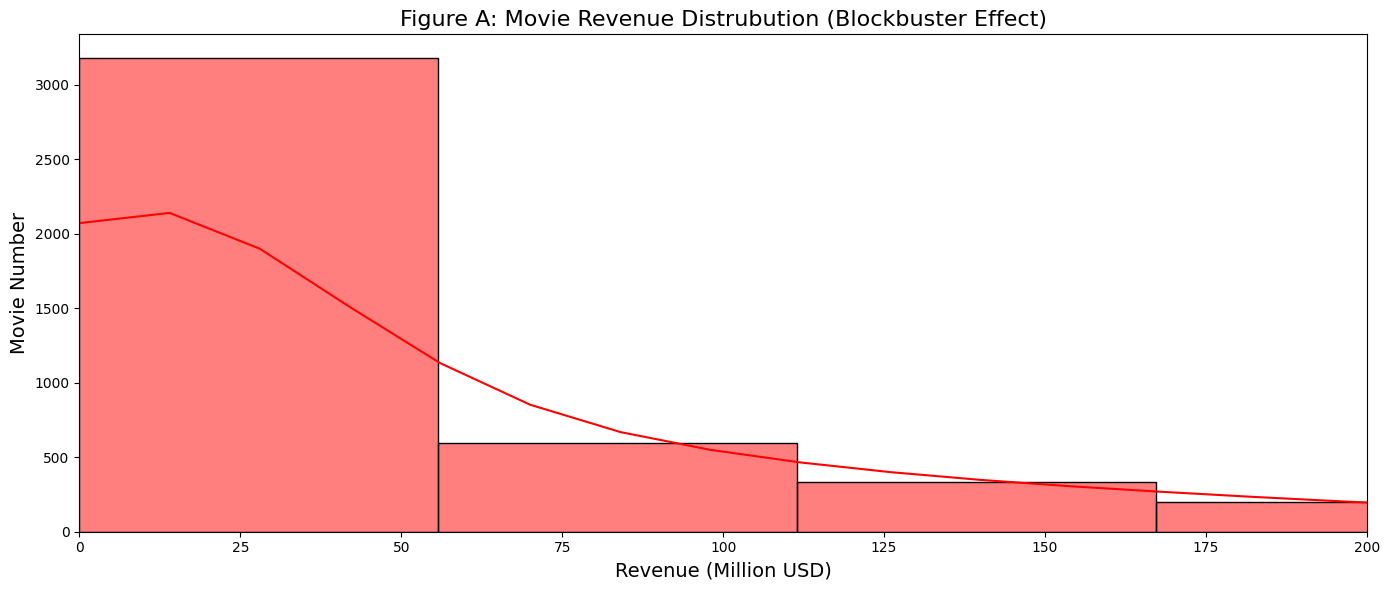

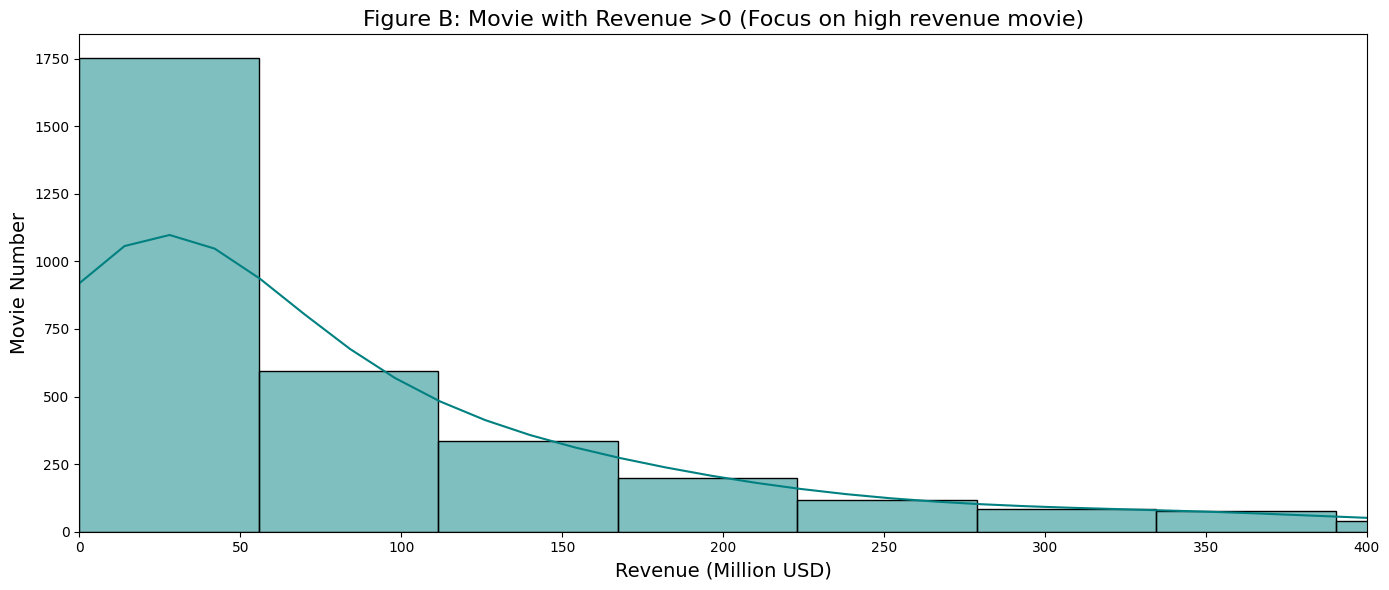


--- Revenue Distribution Supported Data ---
Median of All Movie: 19.17 Million USD (many 0 caused median is lower)
Mean of High Revenue Movie: 117.03 Million USD


In [ ]:
# Purpose: Distinguishing all and high revenue movie
# --- Step 1: Data Preprocessing and Preparation ---

# 1. Build a dataset for Figure A (All Movie)
# used in Figure A
data['revenue'].fillna(0) # NaN means 0 or extremely low revenue
data['revenue_million'] = data['revenue'] / ?? # adjusting unit into Million USD for readability

# 2. Build a sub-dataset for Figure B (High Revenue Movie)
# used in Figure B
df_earning = data[data['revenue'] > 0].copy()
df_earning['revenue_million'] = df_earning['revenue'] / ??


# --- Step 2: Visualization ---

# Figure A: Overall distrubution (many movies are low revenue)
plt.figure(figsize=(14, 6))
# plot histogram by histplot, split into 50 interval (bins)
sns.histplot(data['revenue_million'], bins=50, kde=True, color='red')

plt.title('Figure A: Movie Revenue Distrubution (Blockbuster Effect)', fontsize=16)
plt.xlabel('Revenue (Million USD)', fontsize=14)
plt.ylabel('Movie Number', fontsize=14)
# limited x in range (0, 200M) to emphasis the majority
plt.xlim(0, ??)
plt.tight_layout()
plt.show()

# Focus: how high the bar of 0
# means that most movies belong to low revenue


# Figure B: focus on high revenue movie (medium to high revenue movie)
plt.figure(figsize=(14, 6))
# plotting movie revenue larger than 0
sns.histplot(df_earning['revenue_million'], bins=50, kde=True, color='teal')

plt.title('Figure B: Movie with Revenue >0 (Focus on high revenue movie)', fontsize=16)
plt.xlabel('Revenue (Million USD)', fontsize=14)
plt.ylabel('Movie Number', fontsize=14)
# limited x in range (0, 400M) to emphasis the high revenue movie
plt.xlim(0, 400)
plt.tight_layout()
plt.show()


# --- Step 3: Conclusion ---
# build the median of revenue to separate low and high revenue
median_revenue = data['revenue'].median() / 1e6
mean_earning_revenue = df_earning['revenue'].mean() / 1e6

print("\n--- Revenue Distribution Supported Data ---")
print(f"Median of All Movie: {median_revenue:.2f} Million USD (many 0 caused median is lower)")
print(f"Mean of High Revenue Movie: {mean_earning_revenue:.2f} Million USD")

In [ ]:
data_2 = data.copy().dropna(how='any')
data_2.shape

(1493, 25)

In [ ]:
# Executing Random Forest
# ---  Step 1: Define Prediction Target (y) ---

# Prediction target：translate recommendation problem into binary classification
VOTE_THRESHOLD = 6.5 # setting threshold as 6.5, you can set as 7 or 6
data_2['is_recommended'] = np.where(data_2['vote_average'] >= VOTE_THRESHOLD, 1, 0)
y = data_2['is_recommended']


# --- Step 2: Select and Preparation features (X) ---

# Simplify feature selection: multiple numerical features and one categorical feature
# numerical feature：budget, popularity, runtime
numerical_features = ['budget', 'popularity', 'runtime']
# categorical feature: original_language (generally represents as one-hot encoding)
categorical_features = ['original_language']

# handling categorical feature (One-Hot Encoding)
X_categorical = pd.??(data_2[categorical_features], prefix=categorical_features, dummy_na=False)

# synthesis features
X = pd.??([data_2[numerical_features], X_categorical], axis=1)

# check null data (generally no null data while dropna is execute)
print(f"number of feature: {X.shape[1]} . Number of recommended movie (y=1): {y.sum()} / Number of all movie: {y.count()}")


# --- Step 3: Data Split (Train, Test, Validate) ---

# 1st Split: Train (80%) + Intermediate (20%)
X_train, X_inter, y_train, y_inter = train_test_split(
    X, y,
    test_size=0.2, # 20% intermediate
    random_state=42,
    stratify=y # make sure proportion of y=0 and y=1 are equally
)

# 2nd Split：Intermediate -> Test (10%) + Validate (10%)
X_test, X_val, y_test, y_val = train_test_split(
    X_inter, y_inter,
    test_size=??, # split intermediate into test (10%) and valid (10%)
    random_state=42,
    stratify=y_inter
)

# Tips：introducing the proportion of train, test, valid
print("\n--- Data Split ---")
print(f"Train Set: {len(X_train)} rows ({len(X_train)/len(X):.0%})")
print(f"Test Set: {len(X_test)} rows ({len(X_test)/len(X):.0%})")
print(f"Validate Set: {len(X_val)} rows ({len(X_val)/len(X):.0%})")


# --- Step 4: Building Model of Random Forest Classifier ---

# Random Forest: generally good effect
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
model.fit(X_train, y_train)

# Focus: multiple decision, multiple result, using average or voting to generate final results


# --- Step 5: Estimated Prediction Result (Test Set) ---

# make prediction by test set
y_pred = model.predict(X_test)

# calculating accuracy (ACC)
accuracy = accuracy_score(y_test, y_pred)

# print detailed classification report
report = classification_report(y_test, y_pred, target_names=['Not Recommended (0)', 'Recommended (1)'])

print("\n--- Estimated Prediction Result (Test Set) ---")
print(f"Accuracy(ACC)): {accuracy:.2f}")
print("\nClassification Report:")
print(report)

number of feature: 25 . Number of recommended movie (y=1): 682 / Number of all movie: 1493

--- Data Split ---
Train Set: 1194 rows (80%)
Test Set: 149 rows (10%)
Validate Set: 150 rows (10%)

--- Estimated Prediction Result (Test Set) ---
Accuracy(ACC)): 0.66

Classification Report:
                     precision    recall  f1-score   support

Not Recommended (0)       0.66      0.75      0.71        81
    Recommended (1)       0.65      0.54      0.59        68

           accuracy                           0.66       149
          macro avg       0.66      0.65      0.65       149
       weighted avg       0.66      0.66      0.65       149



In [ ]:
# --- Building Model of XGBoost Classifier ---

# Step 4: initialize XGBoost classifier
# in most case: a smarter algorithm than Random Forest
# it learn from prior error
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', # binary task
    n_estimators=100,            # number of tree
    learning_rate=??,           # the size of each learning step
    max_depth=5,                 # max depth of tree
    use_label_encoder=False,
    eval_metric='logloss',       # setting evaluation metrics
    random_state=42
)

# Training Model (Training Set = X_train, y_train)
xgb_model.fit(X_train, y_train)

print("--- Successfully Training Model of XGBoost Classifier ---")


# --- Step 5: Estimated Prediction Result (Test Set) ---

# make prediction by test set
y_pred_xgb = xgb_model.predict(X_test)

# calculating accuracy (ACC)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# print detailed classification report
report_xgb = classification_report(y_test, y_pred_xgb, target_names=['Not Recommended (0)', 'Recommended (1)'])

print("\n--- Estimated Prediction Result of XGBoost(Test Set) ---")
print(f"XGBoost Accuracy (ACC)): {accuracy_xgb:.2f}")
print("\nClassification Report:")
print(report_xgb)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:06:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- Successfully Training Model of XGBoost Classifier ---

--- Estimated Prediction Result of XGBoost(Test Set) ---
XGBoost Accuracy (ACC)): 0.65

Classification Report:
                     precision    recall  f1-score   support

Not Recommended (0)       0.67      0.70      0.69        81
    Recommended (1)       0.62      0.59      0.61        68

           accuracy                           0.65       149
          macro avg       0.65      0.65      0.65       149
       weighted avg       0.65      0.65      0.65       149

